In [ ]:
#here we test all the components.



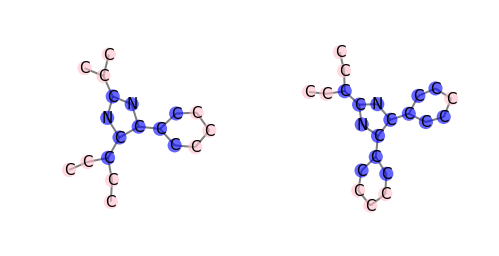

In [1]:
'''
first we test the core/interface extractor, since it is most essential
'''
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
import utils.draw as myutils
import extract
import eden.graph as eg
vec= eg.Vectorizer()


#get a graph
gr = gspan_to_eden( 'data/bursi.pos.gspan' )
g=gr.next()
vec._label_preprocessing(g)


#lets see..
a=extract.extract_core_and_interface(1,g,[2,3],[2])
myutils.drawgraphs([ a[0].graph,a[1].graph ])


interface: 319520


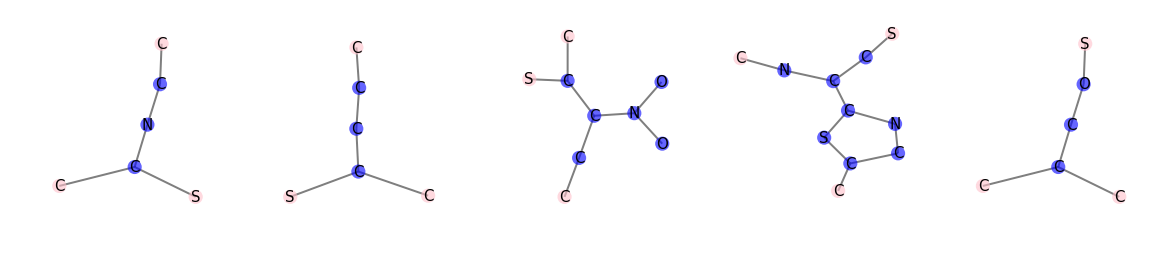

interface: 106534


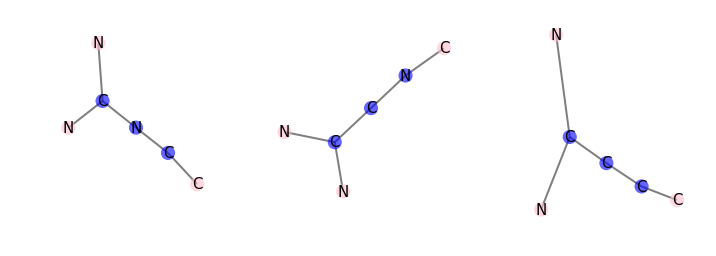

interface: 401454


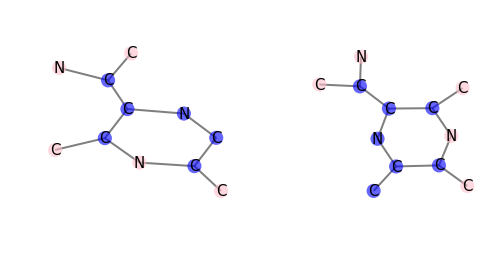

SGDClassifier(alpha=0.000328140269234, average=False, class_weight='auto',
       epsilon=0.1, eta0=8.21249439739, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='hinge', n_iter=64, n_jobs=4,
       penalty='l2', power_t=0.870833595366, random_state=None,
       shuffle=True, verbose=0, warm_start=False)


In [1]:
'''
second is reading a grammar and training an estimator
'''
%matplotlib inline
import utils.draw as myutils
from adaptiveMHgraphsampler import adaptiveMHgraphsampler
from eden.converter.graph.gspan import gspan_to_eden

gr = gspan_to_eden( 'data/bursi.pos.gspan' )
radius_list=[2,4]
thickness_list=[2]

sampler=adaptiveMHgraphsampler()
sampler.train_estimator_and_extract_grammar(gr,
                radius_list,thickness_list,n_jobs=4)


myutils.draw_grammar(sampler,3)
print sampler.estimator
sampler.save('data/demo.ge')


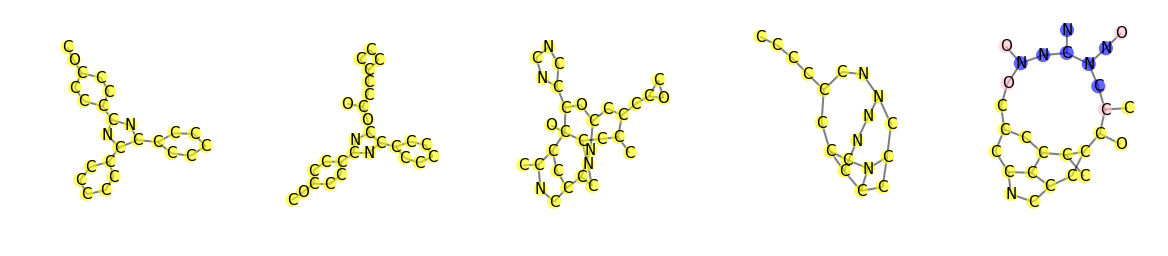

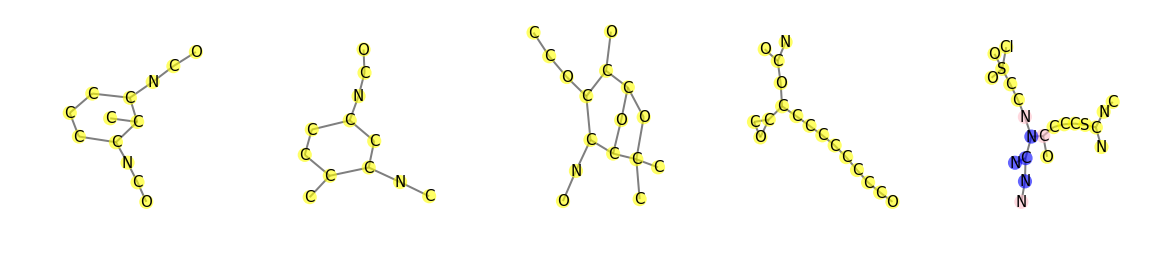

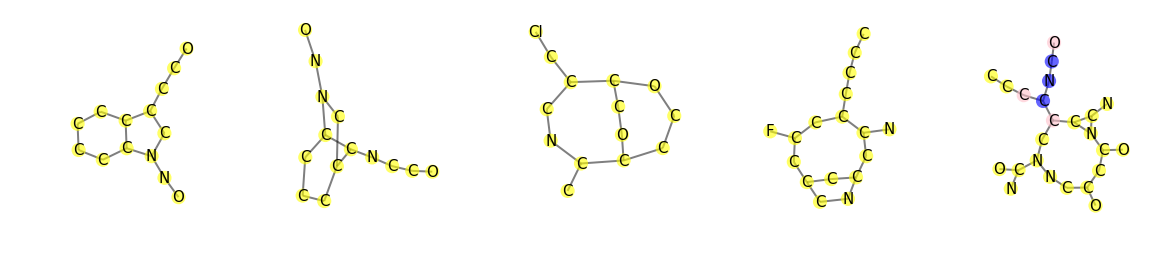

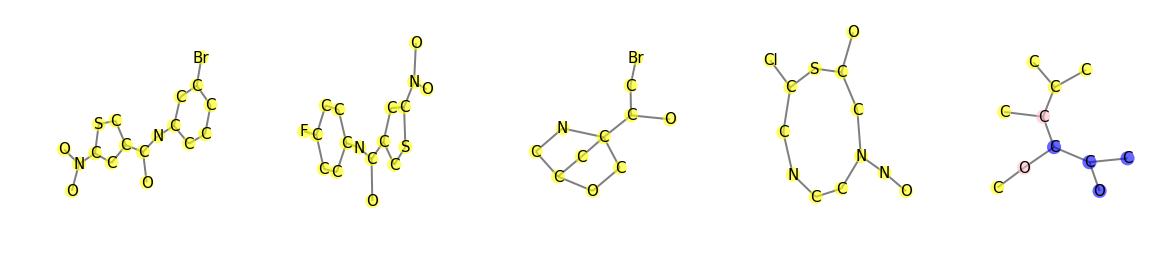

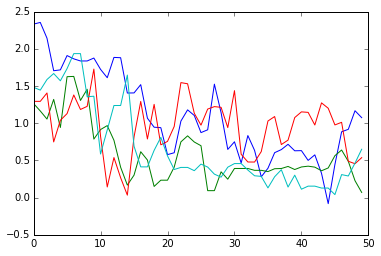

In [1]:
'''
now lets see if we can improve graphs
'''
%matplotlib inline
import utils.draw as myutils
from adaptiveMHgraphsampler import adaptiveMHgraphsampler
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt


sampler=adaptiveMHgraphsampler()
sampler.load('data/demo.ge')


graphs = gspan_to_eden( 'data/bursi.pos.gspan' )
graphs = itertools.islice(graphs,4)
graphs = sampler.mass_improve_random(graphs,
            improvement_rules={'snap_interval':20,'batch_size':1,'improvement_steps':50,'n_jobs':2})

history=[]

for graphs_ in graphs: 
    history.append(graphs_[-1].scorehistory)
    myutils.drawgraphs(graphs_)
    
    
t = range(50)
for h in history:
    plt.plot(t, h)
plt.show()


# to self:
#test :all the stopping criterions to see how likely each one is


In [2]:
'''
inform me when done !
'''
import os
os.system("( speaker-test -t sine -f 1000 )& pid=$! ; sleep 0.5s ; kill -9 $pid")

0